In [1]:
# Manipulação e análise exploratória:
import pandas as pd
import numpy as np
import statistics as sts

# Codificação dos atributos categóricos:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import np_utils
from sklearn.compose import make_column_transformer

# Dividir os dados entre treino e teste:
from sklearn.model_selection import train_test_split

# Modelos:
# NaiveBayes:
from sklearn.naive_bayes import GaussianNB

# Árvores de Decisão:
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine:
from sklearn.svm import SVC

# RandomForest:
from sklearn.ensemble import RandomForestClassifier

# KNN:
from sklearn.neighbors import KNeighborsClassifier

# Rede Neural: Perceptron Multicamadas
from keras.models import Sequential
from keras.layers import Dense

# Métrica de desempenho:
from sklearn.metrics import confusion_matrix, accuracy_score

# Gráficos:
import matplotlib.pyplot as plt

# Carregamento e Limpeza:

In [2]:
df = pd.read_csv("soybean.csv")

In [3]:
df.iloc[:,35].value_counts().count()

19

In [4]:
#Dados Nulos:
df.isnull().sum()

#Dados Duplicados:
df = df.drop_duplicates()

#Valores =  ?:
df[df == "?"].count().sum()

1913

In [5]:
#Valores =  ?, troquei pela Moda:
atributos = df.columns
modas = []
i = 0
for item in atributos:
    modas.append(sts.mode(df.loc[~(df[item] == "?"), item]))
    df.loc[df[item] == "?",item] = modas[i]
    i+=1

In [6]:
df.iloc[:,35].value_counts().sort_values(ascending=False)

alternarialeaf-spot            88
frog-eye-leaf-spot             81
brown-spot                     77
phytophthora-rot               71
anthracnose                    44
brown-stem-rot                 42
purple-seed-stain              20
powdery-mildew                 20
bacterial-blight               20
bacterial-pustule              20
downy-mildew                   20
phyllosticta-leaf-spot         20
charcoal-rot                   20
rhizoctonia-root-rot           20
diaporthe-stem-canker          20
2-4-d-injury                   16
diaporthe-pod-&-stem-blight    14
cyst-nematode                  10
herbicide-injury                8
Name: class, dtype: int64

In [7]:
for item in atributos:
    print(df[item].unique())
    print("")

['october' 'august' 'july' 'september' 'may' 'april' 'june']

['normal' 'lt-normal']

['gt-norm' 'lt-norm' 'norm']

['norm' 'gt-norm' 'lt-norm']

['yes' 'no']

['same-lst-yr' 'same-lst-two-yrs' 'same-lst-sev-yrs' 'diff-lst-year']

['low-areas' 'scattered' 'whole-field' 'upper-areas']

['pot-severe' 'severe' 'minor']

['none' 'fungicide' 'other']

['90-100' '80-89' 'lt-80']

['abnorm' 'norm']

['abnorm' 'norm']

['absent' 'no-yellow-halos' 'yellow-halos']

['dna' 'w-s-marg' 'no-w-s-marg']

['dna' 'gt-1/8' 'lt-1/8']

['absent' 'present']

['absent' 'present']

['absent' 'upper-surf' 'lower-surf']

['abnorm' 'norm']

['no' 'yes']

['above-sec-nde' 'absent' 'below-soil' 'above-soil']

['brown' 'dna' 'tan' 'dk-brown-blk']

['present' 'absent']

['firm-and-dry' 'absent' 'watery']

['absent' 'present']

['none' 'black' 'brown']

['absent' 'present']

['norm' 'dna' 'diseased' 'few-present']

['dna' 'absent' 'colored' 'brown-w/blk-specks']

['norm' 'abnorm']

['absent' 'present']

['absent' 'pr

# Modelagem dos Dados:

## Atributos:

In [8]:
# Carregamento dos atributos:
x = df.iloc[:,0:35].values
y = df.iloc[:,35].values

## Codificação dos atributos categóricos:

In [9]:
# Codificação das classes:
y = LabelEncoder().fit_transform(y)

# Codificação de todos os atributos previsores como Label Encoding:
objeto_cod = []

for i in range(x.shape[1]):
    objeto_cod.append(LabelEncoder())
    x[:,i]= objeto_cod[-1].fit_transform(x[:,i])

## Split (Train - Test):

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

## Modelo e Treinamento:

In [11]:
# Criação dos modelos convencionais:
lista_modelos = [GaussianNB(),
                 DecisionTreeClassifier(),
                 SVC(),
                 RandomForestClassifier(n_estimators = 500),
                 KNeighborsClassifier(n_neighbors=3)
                ]
for modelo in lista_modelos:
    modelo.fit(x_train, y_train)

## Métricas de Desempenho:

In [12]:
# Previsões: Hold-Out
previsoes = []
taxa_acerto = []
for modelo in lista_modelos:
    previsoes.append(modelo.predict(x_test))
    taxa_acerto.append(accuracy_score(y_test, previsoes[-1]))

# Utilizando Redes Neurais:

## Codificação One-Hot para as classes

In [13]:
# Já estava codificado como Label Encoding, mas o modelo exige One-Hot Encondig:
onehot = OneHotEncoder(categories='auto', sparse=False)
y = onehot.fit_transform(y.reshape(-1,1))

## Split

In [14]:
# Divisõo:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

In [15]:
# Correção exigida pelo Keras/TensorFlow:
x_train = x_train.astype(np.float)
y_train = y_train.astype(np.float)
x_test = x_test.astype(np.float)
y_test = y_test.astype(np.float)

In [16]:
x.shape[1]

35

## Modelo e Treinamento

In [17]:
# Modelo: 
modelo_classifier = Sequential()
modelo_classifier.add(Dense(units = 35, kernel_initializer = 'uniform', activation = 'relu', input_dim = x.shape[1] ))
modelo_classifier.add(Dense(units = 19, kernel_initializer = 'uniform', activation = 'relu'))
modelo_classifier.add(Dense(units = 19, kernel_initializer = 'uniform', activation = 'softmax'))

#Compilação:
modelo_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Visualização da estrutura da rede neural:
modelo_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35)                1260      
_________________________________________________________________
dense_1 (Dense)              (None, 19)                684       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
Total params: 2,324
Trainable params: 2,324
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Treinamento:
modelo_classifier.fit(x_train, y_train, epochs = 1000, verbose=0)

# Resultado Final

In [19]:
# Ajustes para apresentar um resultado mais "limpo":

In [20]:
matrix_y_test = np.empty(shape = y_test.shape[0])
matrix_y_pred = np.empty(shape = y_test.shape[0])
pred = modelo_classifier.predict(x_test)

for i in range(pred.shape[1]):
    matrix_y_test[i] = np.argmax(y_test[i])
    matrix_y_pred[i] = np.argmax(pred[i])

In [21]:
matrix_y_pred = matrix_y_pred.astype(np.int)
matrix_y_test = matrix_y_test.astype(np.int)

In [22]:
previsoes.append(matrix_y_pred)
taxa_acerto.append(accuracy_score(matrix_y_test, previsoes[-1]))

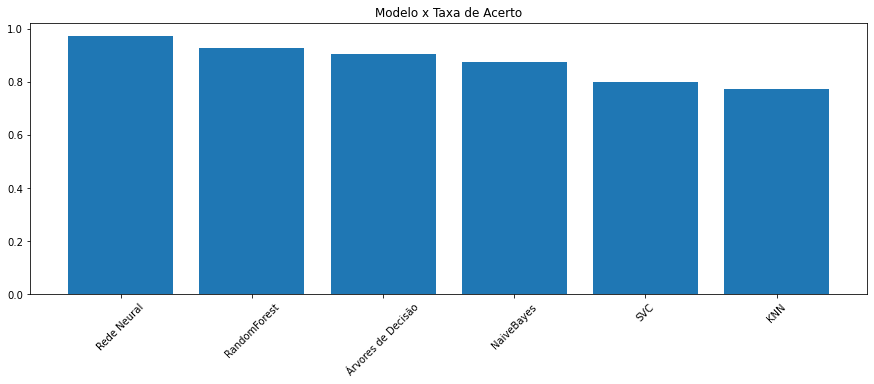

In [23]:
models = ["NaiveBayes", "Árvores de Decisão", "SVC", "RandomForest", "KNN", "Rede Neural"]
df_res = pd.DataFrame({"Modelos":models, "TxAcerto":taxa_acerto})
df_res = df_res.set_index("Modelos")
grafico = df_res.TxAcerto.sort_values(ascending=False)

plt.figure(figsize=(15,5))
plt.bar(grafico.index, grafico.values)
plt.title("Modelo x Taxa de Acerto")
plt.xticks(rotation=45)
plt.show()

In [24]:
grafico

Modelos
Rede Neural           0.973684
RandomForest          0.926316
Árvores de Decisão    0.905263
NaiveBayes            0.873684
SVC                   0.800000
KNN                   0.773684
Name: TxAcerto, dtype: float64